### Isolation Forest

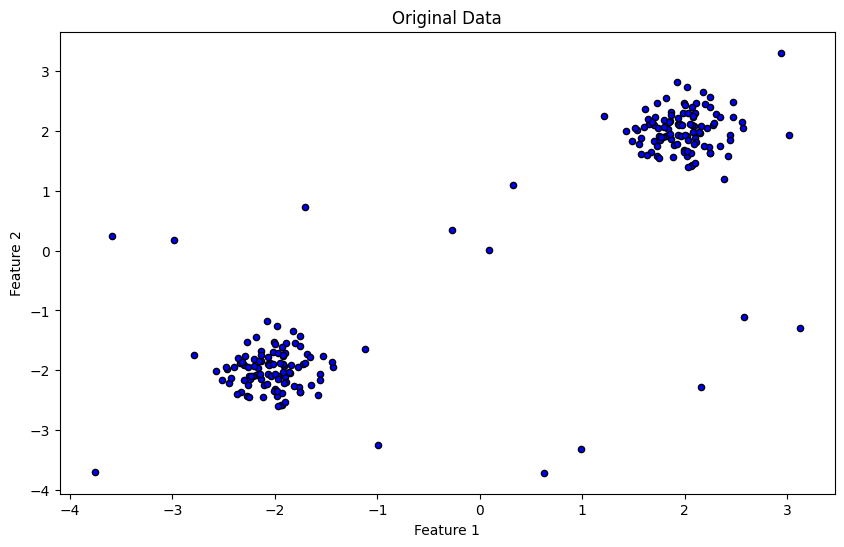

In [29]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generating a sample 2D dataset
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine the datasets
X = np.r_[X_train, X_outliers]

# Plotting the dataset before outlier detection
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, edgecolor='k')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [30]:
# Fit the model
clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.1)
# contamination = 0.1 -> Top 10% data points considered as outliers
clf.fit(X)
y_pred = clf.predict(X)

In [31]:
clf.score_samples(X) # Anomaly Scores

array([-0.4150876 , -0.47280663, -0.41240545, -0.4821969 , -0.40096936,
       -0.40942865, -0.46646703, -0.49206591, -0.41587151, -0.45289276,
       -0.47318204, -0.43660416, -0.40279112, -0.42581089, -0.40681209,
       -0.48796357, -0.42017964, -0.45319263, -0.46812032, -0.44344699,
       -0.42782874, -0.40897581, -0.46595917, -0.4351456 , -0.45406973,
       -0.40295997, -0.4059808 , -0.46621039, -0.41392589, -0.43034699,
       -0.4087553 , -0.45042347, -0.47579758, -0.42941338, -0.41243517,
       -0.45845622, -0.45474565, -0.55668368, -0.40510743, -0.46654577,
       -0.40291344, -0.48080457, -0.41816602, -0.43440765, -0.40468325,
       -0.4252439 , -0.41072405, -0.45317532, -0.40426194, -0.40617457,
       -0.45481543, -0.41833185, -0.40367683, -0.51204603, -0.41064612,
       -0.49503604, -0.52784811, -0.40112833, -0.42306254, -0.46558963,
       -0.44646143, -0.50412269, -0.5280767 , -0.4246619 , -0.40514328,
       -0.46842696, -0.42359279, -0.47131257, -0.4122756 , -0.45

In [32]:
# Labeling the outlier
clf.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### 📌 **Anomaly Score Formula**

Given a data point $x$, its **anomaly score** $s(x, n)$ is computed as:

$$
s(x, n) = 2^{-\frac{E(h(x))}{c(n)}}
$$

Where:

* $E(h(x))$ = the average path length of point $x$ across all isolation trees
* $n$ = the number of samples used to build the trees
* $c(n)$ = the average path length of unsuccessful searches in a Binary Search Tree (BST), used to normalize the score

$$
c(n) = 2H(n - 1) - \frac{2(n - 1)}{n}
$$

Where $H(i)$ is the $i$-th harmonic number, approximated by:

$$
H(i) \approx \ln(i) + \gamma \quad \text{(Euler–Mascheroni constant \( \gamma \approx 0.5772 \))}
$$

#### 🧠 **Intuition**

* **Shorter path length** → Easier to isolate → **More likely an anomaly**
* **Longer path length** → Harder to isolate → **More likely normal**

#### 🎯 **Interpretation of Score**

* $s(x, n) \approx 1$: highly likely to be an anomaly
* $s(x, n) < 0.5$: likely to be normal
* $s(x, n) \approx 0.5$: on the boundary

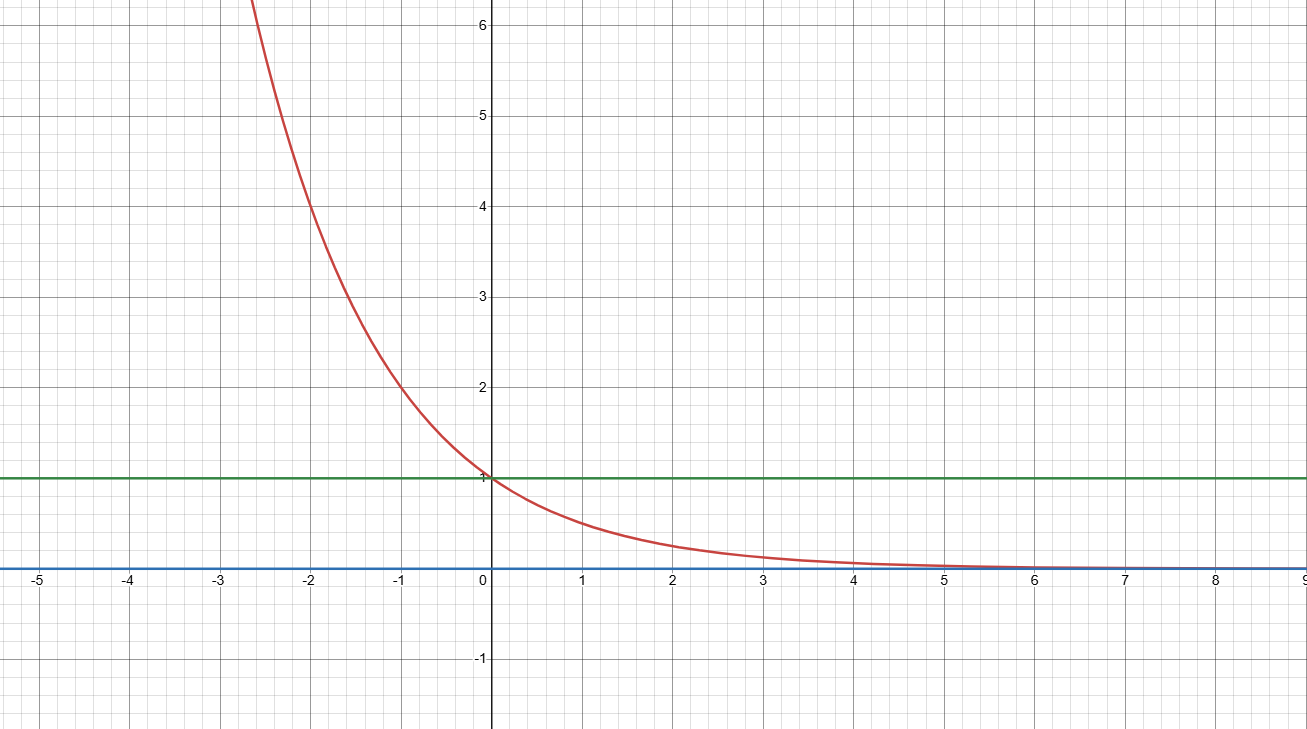

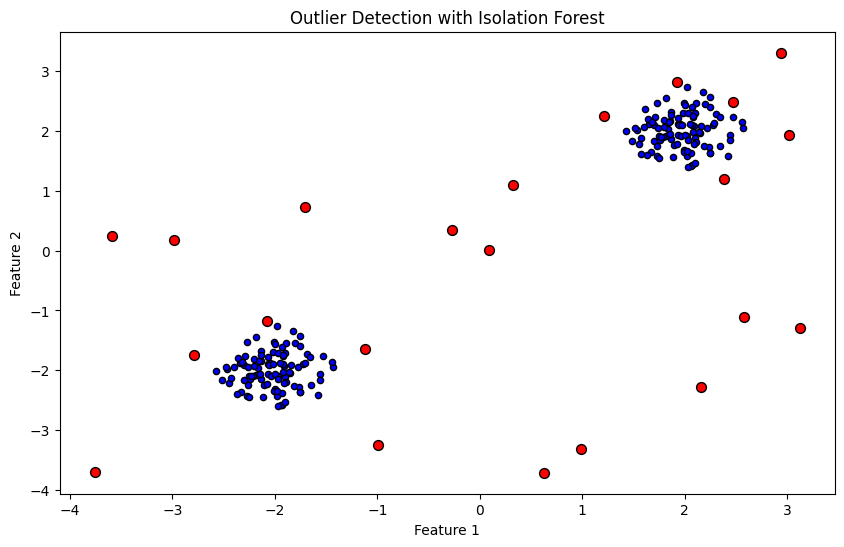

In [33]:
# Visualizing the data points and the outliers detected
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, edgecolor='k')

# Highlighting the outliers
is_outlier = y_pred == -1
plt.scatter(X[is_outlier, 0], X[is_outlier, 1], color='r', s=50, edgecolor='k')

plt.title("Outlier Detection with Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

---

### KNN

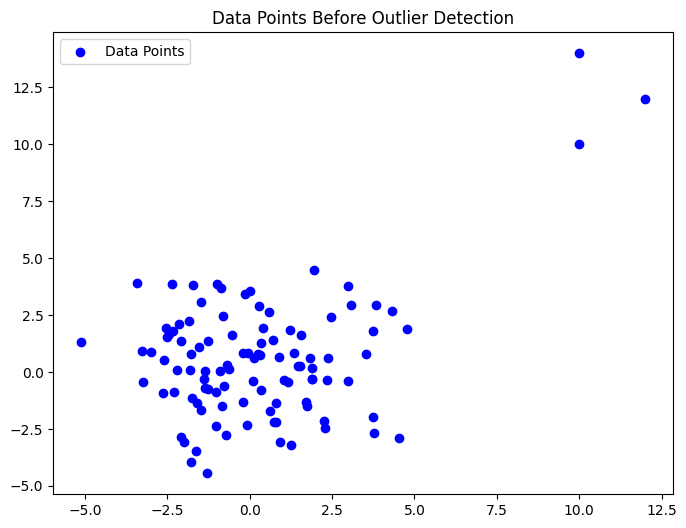

In [34]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Generating more sample data
np.random.seed(0)
X_normal = np.random.randn(100, 2) * 2
X_outliers = np.array([[10, 10], [12, 12], [10, 14]])
X = np.concatenate([X_normal, X_outliers], axis=0)

# Plot the data before outlier detection
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data Points')
plt.title('Data Points Before Outlier Detection')
plt.legend()
plt.show()

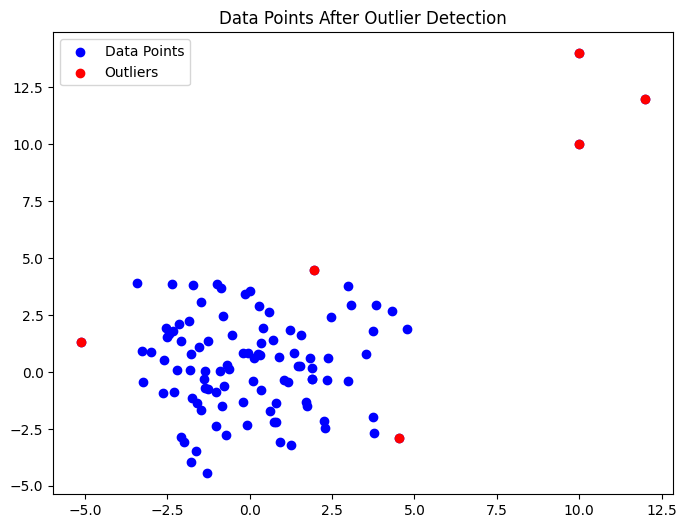

In [35]:
# Set the number of neighbors
k = 2

# Fit the model
nbrs = NearestNeighbors(n_neighbors = k + 4).fit(X) # The plus 4 is to avoid the point itself
distances, indices = nbrs.kneighbors(X)

# Calculate the outlier score
outlier_scores = np.mean(distances[:, 1:], axis=1)

# Determine a threshold
threshold = np.percentile(outlier_scores, 95)  # using the 95th percentile as the threshold

# Identify outliers
outlier_indices = np.where(outlier_scores > threshold)[0]
outliers = X[outlier_indices]

# Plot the data after outlier detection
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data Points')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.title('Data Points After Outlier Detection')
plt.legend()
plt.show()

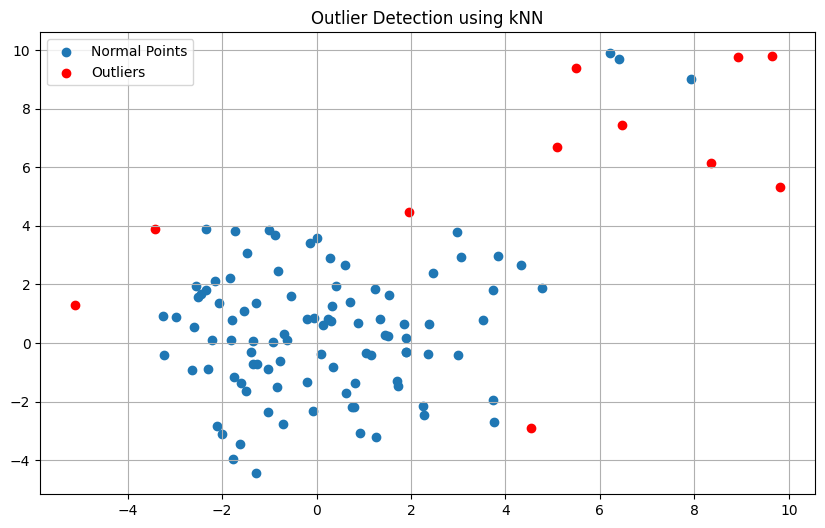

In [36]:
import numpy as np

# Generating the data
np.random.seed(0)
X_normal = np.random.randn(100, 2) * 2
X_outliers = np.concatenate([
    np.random.uniform(low=5, high=10, size=(10, 1)),
    np.random.uniform(low=5, high=10, size=(10, 1))
], axis=1)
data = np.concatenate([X_normal, X_outliers], axis=0)

from sklearn.neighbors import NearestNeighbors

# Number of neighbors
k = 5

# Fit the model
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(data)
distances, indices = nbrs.kneighbors(data)

# Compute the average distance to k nearest neighbors as the outlier score
outlier_scores = np.mean(distances[:, 1:], axis=1)

# Determine a threshold for outlier detection
# Here, we use the 95th percentile as the threshold
threshold = np.percentile(outlier_scores, 90)

# Points with a score above the threshold are considered outliers
is_outlier = outlier_scores > threshold

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data[~is_outlier, 0], data[~is_outlier, 1], label='Normal Points')
plt.scatter(data[is_outlier, 0], data[is_outlier, 1], color='r', label='Outliers')
plt.title('Outlier Detection using kNN')
plt.legend()
plt.grid(True)
plt.show()

#### KNN cannot work with data contains `Local Outliers`.
*KNN calculates absolute distances, which can cause problems if there are two clusters with different densities. For example, if one cluster is dense and the other is sparse, but the dense one has a local outlier, increasing the percentage of outliers in the data can result in the entire sparse cluster being detected as an outlier.*

*This problem can be solved by `Local Outlier Factor (LOF)`, which is built on top of KNN but considers densities instead of distances.*

---

### Local Outlier Factor

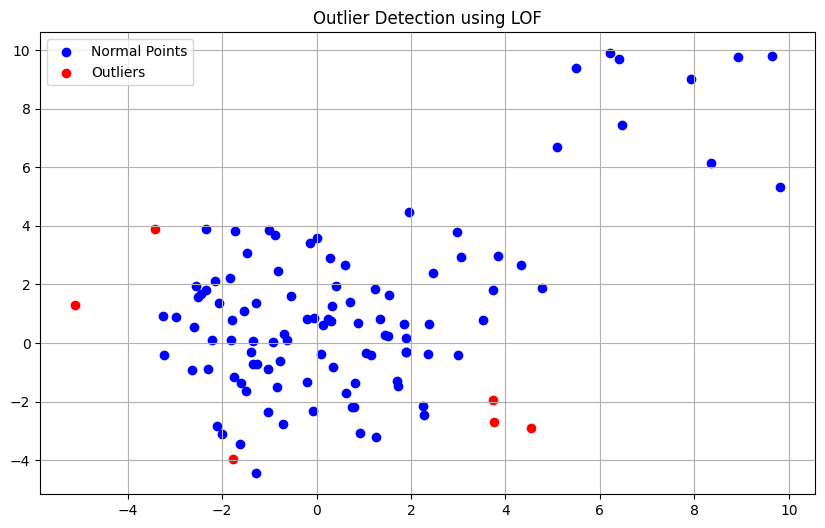

In [37]:
from sklearn.neighbors import LocalOutlierFactor

# Applying LOF
clf_lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
y_pred_lof = clf_lof.fit_predict(data)
lof_scores = -clf_lof.negative_outlier_factor_  # Inverting the negative LOF scores for better interpretation

# Identifying the outliers based on the LOF prediction
is_outlier_lof = y_pred_lof == -1

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data[~is_outlier_lof, 0], data[~is_outlier_lof, 1], color='blue', label='Normal Points')
plt.scatter(data[is_outlier_lof, 0], data[is_outlier_lof, 1], color='red', label='Outliers')
plt.title('Outlier Detection using LOF')
plt.legend()
plt.grid(True)
plt.show()

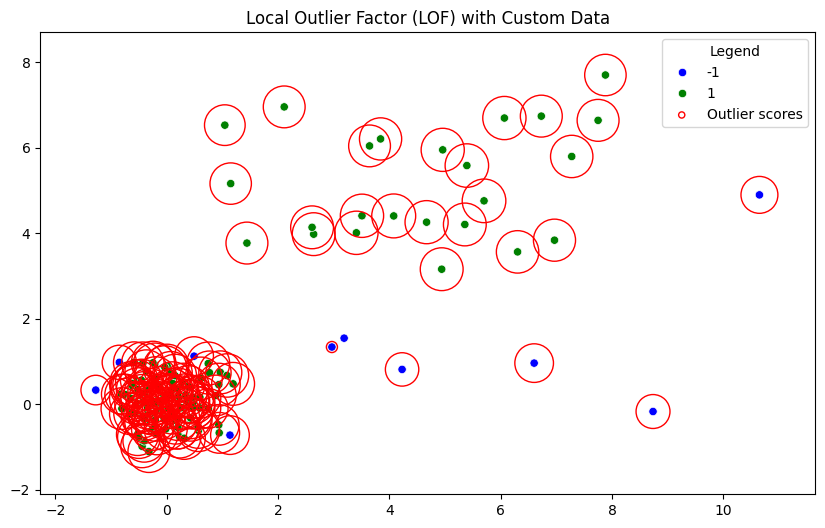

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection
import seaborn as sns

# Set seed for reproducibility
np.random.seed(0)

# Generate a dense cluster
dense_cluster = np.random.normal(loc=0, scale=0.5, size=(100, 2))

# Generate a sparse cluster
sparse_cluster = np.random.normal(loc=5, scale=2.5, size=(30, 2))

# Combine the clusters
X = np.concatenate([dense_cluster, sparse_cluster])

# Applying LOF
clf_lof = LocalOutlierFactor(n_neighbors=5)
y_pred_lof = clf_lof.fit_predict(X)
X_scores = -clf_lof.negative_outlier_factor_  # Negative scores, higher is more abnormal

# Calculate the radius of each circle, inversely proportional to the outlier score - Higher radius <-> Higher abnormality
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Define a function to update legend marker size for clarity
def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

# Plotting the data points and circles representing outlier scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred_lof, palette=['blue', 'green'])
scatter = plt.scatter(
    X[:, 0], X[:, 1],
    s=1000 * radius,  # Adjust the multiplier for circle sizes as necessary
    edgecolors="red",
    facecolors="none",
    label="Outlier scores"
)
plt.axis("tight")
plt.xlim((X[:, 0].min() - 1, X[:, 0].max() + 1))
plt.ylim((X[:, 1].min() - 1, X[:, 1].max() + 1))
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)},
           title="Legend")
plt.title("Local Outlier Factor (LOF) with Custom Data")
plt.show()

---

### DBSCAN

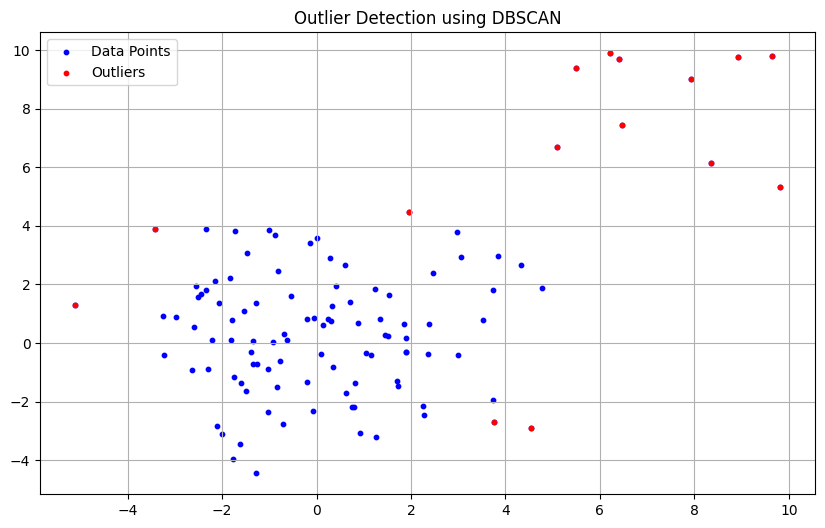

In [43]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN to the dataset
dbscan = DBSCAN(eps=1.5, min_samples=7)  # These parameters can be adjusted
clusters = dbscan.fit_predict(data)

# Identifying the outliers
outliers = data[clusters == -1]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points', s=10)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=10)
plt.title('Outlier Detection using DBSCAN')
plt.legend()
plt.grid(True)
plt.show()

### Comparison

| Feature/Technique      | Z-Score Technique                | IQR and Box Plot Method         | Isolation Forest                | KNN (k-Nearest Neighbors)      | LOF (Local Outlier Factor)     | DBSCAN (Density-Based Spatial Clustering of Applications with Noise) |
|------------------------|----------------------------------|---------------------------------|---------------------------------|--------------------------------|--------------------------------|---------------------------------------------------------------------|
| **Method Type**        | Statistical                     | Statistical                     | Ensemble Method                 | Distance-Based                 | Density-Based                  | Density-Based                                                       |
| **Approach**           | Standard deviation and mean     | Quartiles and median            | Random forest isolation         | Nearest neighbors distance     | Local density comparison       | Density-based clustering                                            |
| **Key Parameters**     | Threshold for Z-score (e.g., 3) | IQR multiplier (typically 1.5)  | Number of trees, path length    | Number of neighbors (k)        | Number of neighbors (k), radius | Epsilon (eps), MinPts                                              |
| **Sensitivity**        | Very sensitive to outliers      | Moderately sensitive            | Robust to outliers              | Sensitive to local outliers    | Sensitive to local density     | Sensitive to density variations                                     |
| **Scalability**        | Very scalable                   | Very scalable                   | Good scalability                | Poor with large datasets       | Poor with large datasets       | Poor with large datasets                                            |
| **Best Use Case**      | Gaussian-distributed data       | Non-Gaussian, not too skewed    | High-dimensional, mixed feature types | Small, low-dimensional datasets | Varying density clusters      | Spatial data with clear density gaps                                |
| **Interpretability**   | Very interpretable              | Highly interpretable            | Less interpretable              | Moderately interpretable       | Less interpretable             | Moderately interpretable                                            |
| **Advantages**         | Easy to understand and implement| Easy to understand, robust to mild outliers | Handles large feature sets well| Intuitive, effective in many scenarios | Effective in detecting outliers in varying density data | Good at identifying clusters and noise                              |
| **Disadvantages**      | Assumes normality, not good for multimodal data | Can miss outliers in a skewed distribution | Requires parameter tuning, complex | Sensitive to k, not good for high-dimensional data | Requires parameter tuning, complex | Parameters eps and MinPts can be hard to set, not ideal for high-dimensional data |
| **Output**             | Binary classification (inlier/outlier) | Binary classification (inlier/outlier) | Outlier score (continuous)     | Binary classification or score | Outlier score (continuous)     | Cluster labels (including noise)                                    |
| **Model Type**         | Unsupervised                    | Unsupervised                    | Unsupervised                    | Unsupervised or semi-supervised| Unsupervised                    | Unsupervised                                                        |
| **Data Assumption**    | Assumes feature independence    | Assumes feature independence    | No assumption on data structure | Assumes local similarity       | Assumes local similarity       | Assumes clusters are dense regions of points                        |
| **Robustness**         | Not robust to skewed data       | More robust than Z-score        | Robust to isolated noise        | Moderate robustness            | Robust to local density changes| Robust to cluster shape variations                                  |
